In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('avengers.csv',encoding = 'latin-1')

In [48]:
data.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

here lot of null values

In [50]:
data.drop(['Probationary Introl','URL'],axis=1,inplace=True)

In [51]:
#changed the null values to No
data['Death1'].fillna('No', inplace = True)
data['Death2'].fillna('No', inplace = True) 
data['Death3'].fillna('No', inplace = True) 
data['Death4'].fillna('No', inplace = True) 
data['Death5'].fillna('No', inplace = True) 
data['Return1'].fillna('No', inplace = True)
data['Return2'].fillna('No', inplace = True) 
data['Return3'].fillna('No', inplace = True) 
data['Return4'].fillna('No', inplace = True) 
data['Return5'].fillna('No', inplace = True) 
data["Full/Reserve Avengers Intro"].fillna('Unknown', inplace = True)

In [52]:
data.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,Sep-63,1963,52,Full,YES,NO,No,No,No,No,No,No,No,No,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,Sep-63,1963,52,Full,YES,YES,No,No,No,No,No,No,No,No,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,Sep-63,1963,52,Full,YES,YES,No,No,No,No,No,No,No,No,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,Sep-63,1963,52,Full,YES,YES,No,No,No,No,No,No,No,No,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,Sep-63,1963,52,Full,YES,YES,YES,NO,No,No,No,No,No,No,Dies in Fear Itself brought back because that'...


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name/Alias                   163 non-null    object 
 1   Appearances                  173 non-null    float64
 2   Current?                     173 non-null    object 
 3   Gender                       173 non-null    object 
 4   Full/Reserve Avengers Intro  173 non-null    object 
 5   Year                         173 non-null    int64  
 6   Years since joining          173 non-null    int64  
 7   Honorary                     173 non-null    object 
 8   Death1                       173 non-null    object 
 9   Return1                      173 non-null    object 
 10  Death2                       173 non-null    object 
 11  Return2                      173 non-null    object 
 12  Death3                       173 non-null    object 
 13  Return3             

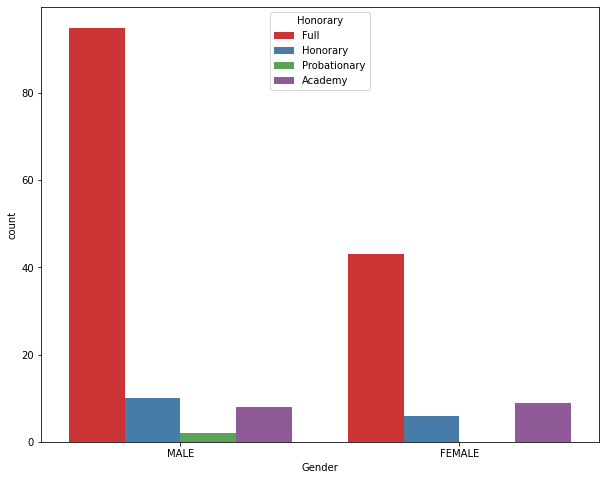

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Gender',hue='Honorary',palette='Set1');

#### How many male and female active

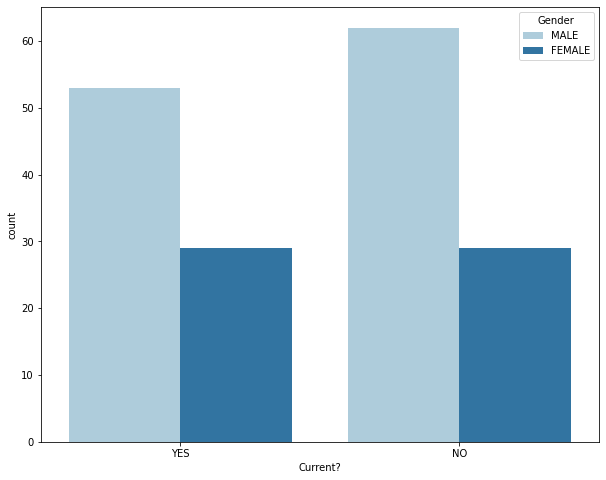

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x="Current?",hue="Gender",palette='Paired');

In [38]:
data.columns

Index(['Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Full/Reserve Avengers Intro', 'Year', 'Years since joining',
       'Honorary', 'Death1', 'Return1', 'Death2', 'Return2', 'Death3',
       'Return3', 'Death4', 'Return4', 'Death5', 'Return5', 'Notes'],
      dtype='object')

#### How many times appeared on screen

In [62]:
def disturbition(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

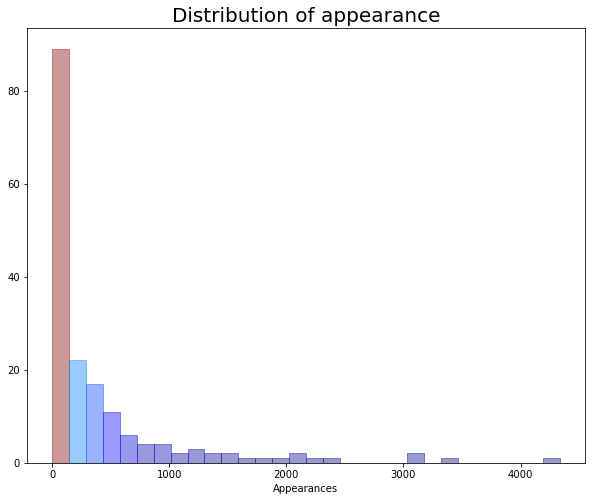

In [63]:
disturbition(data.Appearances,'Distribution of appearance')

#### joining year and current status by gender

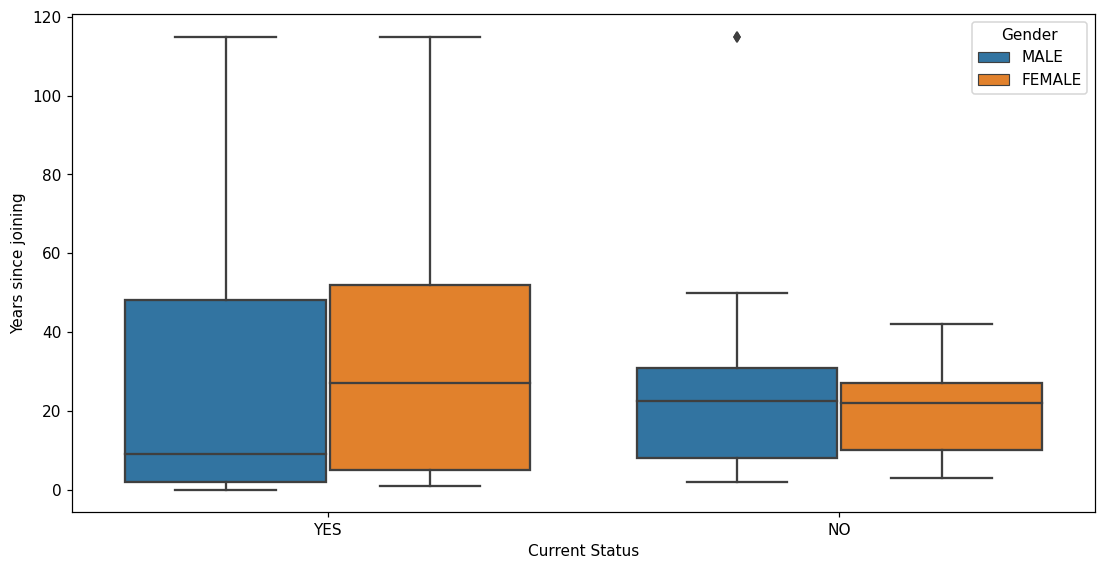

In [5]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Years since joining',x='Current?',hue="Gender",data=data)
plt.xlabel('Current Status');

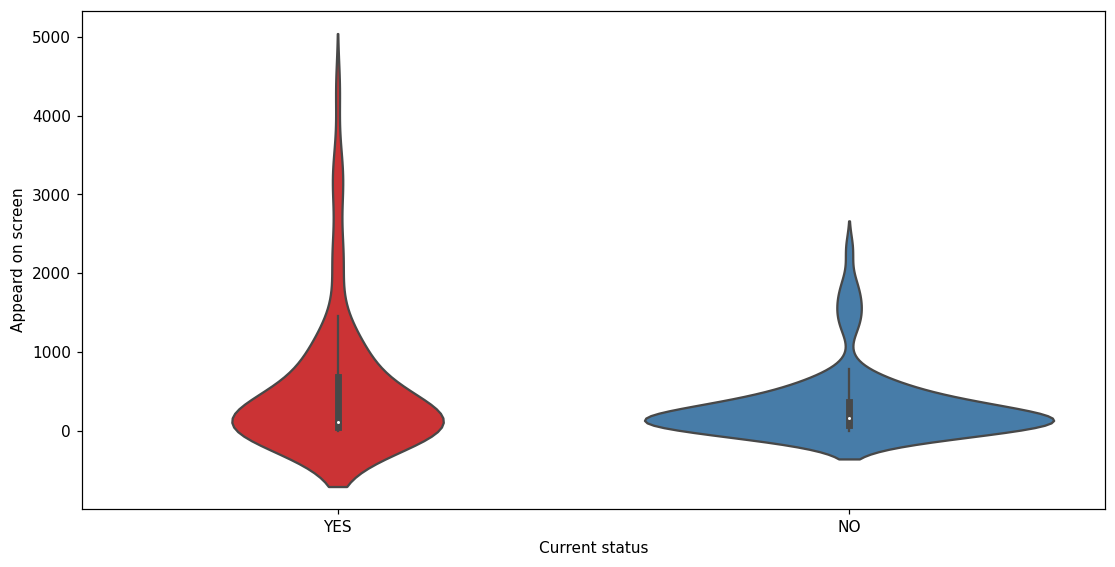

In [73]:
plt.figure(figsize=(12,6),dpi=110)
sns.violinplot(y='Appearances',x='Current?',data=data,palette='Set1')
plt.xlabel('Current status')
plt.ylabel('Appeard on screen');

<Figure size 1650x880 with 0 Axes>

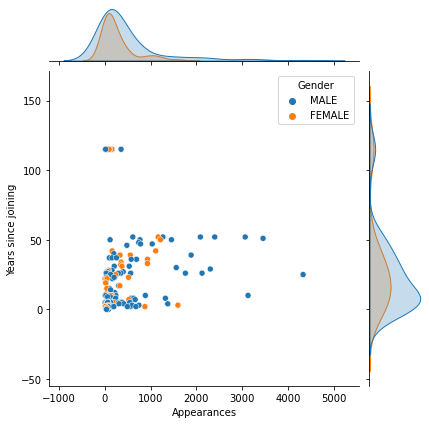

In [79]:
plt.figure(figsize=(15,8),dpi=110)
sns.jointplot(x='Appearances',y='Years since joining',data=data,hue="Gender");

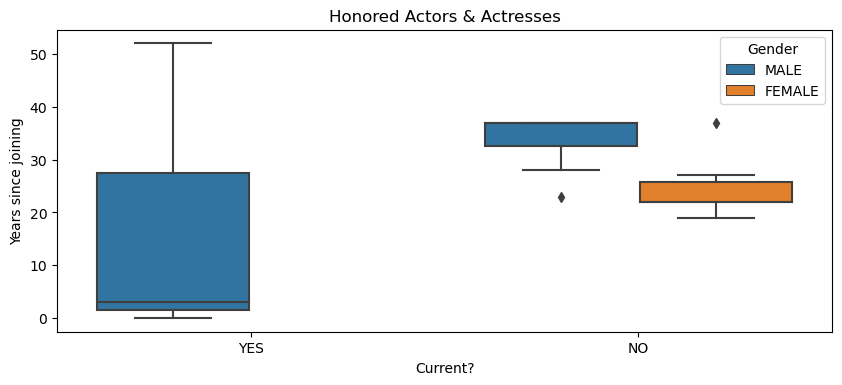

In [87]:
is_honory = data[data['Honorary']=='Honorary']
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x='Current?',y='Years since joining',data=is_honory,hue="Gender")
plt.title("Honored Actors & Actresses");

##### Looking for dead and alive avengers

In [91]:
#Notes given for the avengers who died
still_alive = data[data['Notes'].isnull()]
dead = data[data['Notes'].notnull()]

In [93]:
still_alive.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
5,Richard Milhouse Jones,612.0,YES,MALE,Sep-63,1963,52,Honorary,NO,No,No,No,No,No,No,No,No,No,NaN
11,Heracles,741.0,YES,MALE,Oct-67,1967,48,Full,NO,No,No,No,No,No,No,No,No,No,NaN
12,T'Challa,780.0,NO,MALE,May-68,1968,47,Full,NO,No,No,No,No,No,No,No,No,No,NaN
14,Dane Whitman,482.0,NO,MALE,Dec-69,1969,46,Full,NO,No,No,No,No,No,No,No,No,No,NaN
17,Henry P. McCoy,1886.0,NO,MALE,Sep-76,1976,39,Full,NO,No,No,No,No,No,No,No,No,No,NaN


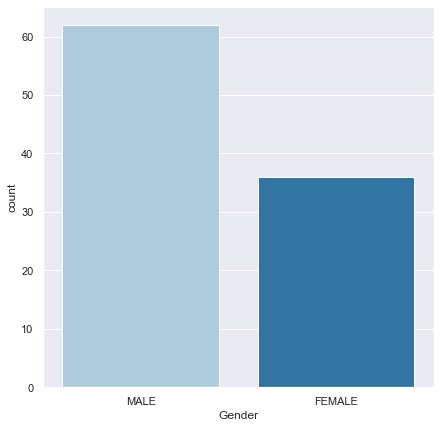

In [96]:
#count of avengers who are alive
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(data = still_alive, x="Gender",palette='Paired');

<AxesSubplot:xlabel='Gender', ylabel='Appearances'>

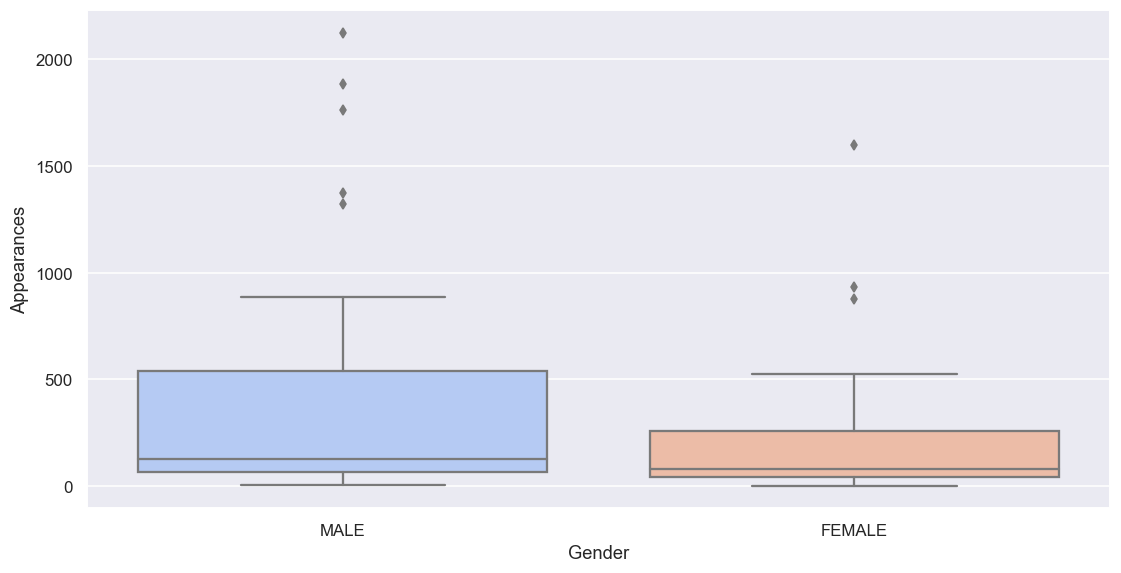

In [103]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Appearances',x='Gender',data=still_alive,palette='coolwarm')

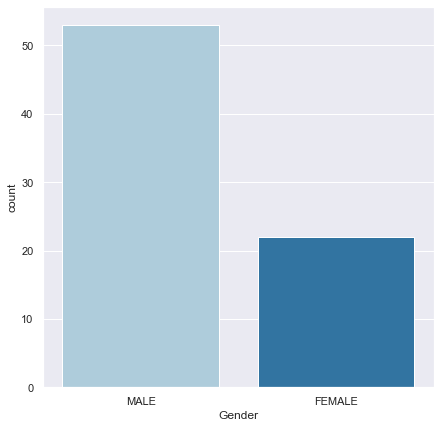

In [98]:
#count avangers who were dead
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(data = dead, x="Gender",palette='Paired');

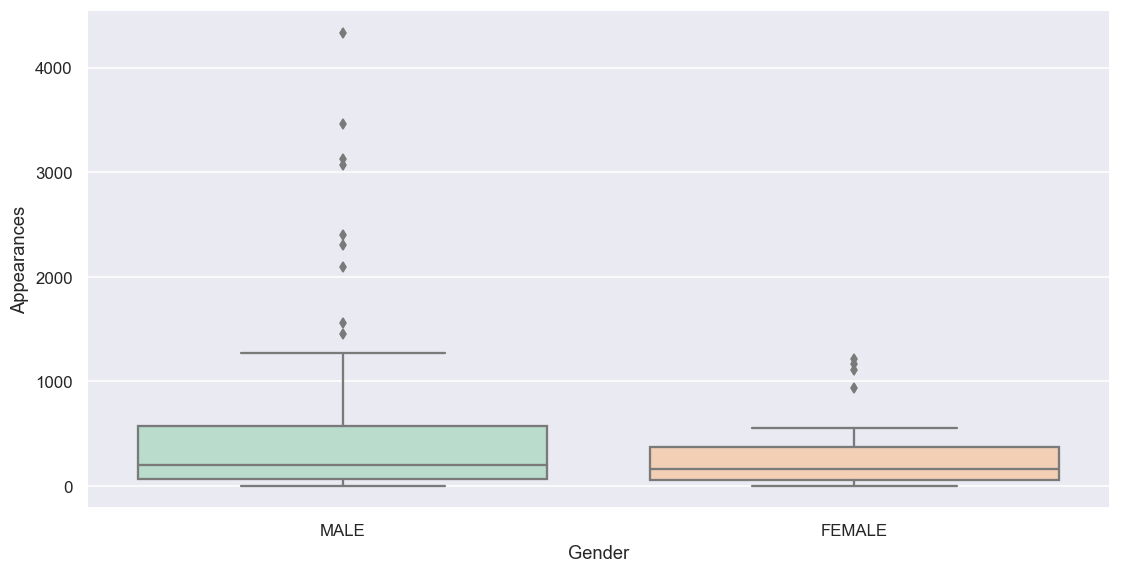

In [101]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Appearances',x='Gender',data=dead,palette='Pastel2');

In [114]:
# this fonction for make only black and white color
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
from PIL import Image
mask = np.array(Image.open('supernero.png'))
transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed[i] = list(map(transform_format,mask[i]))

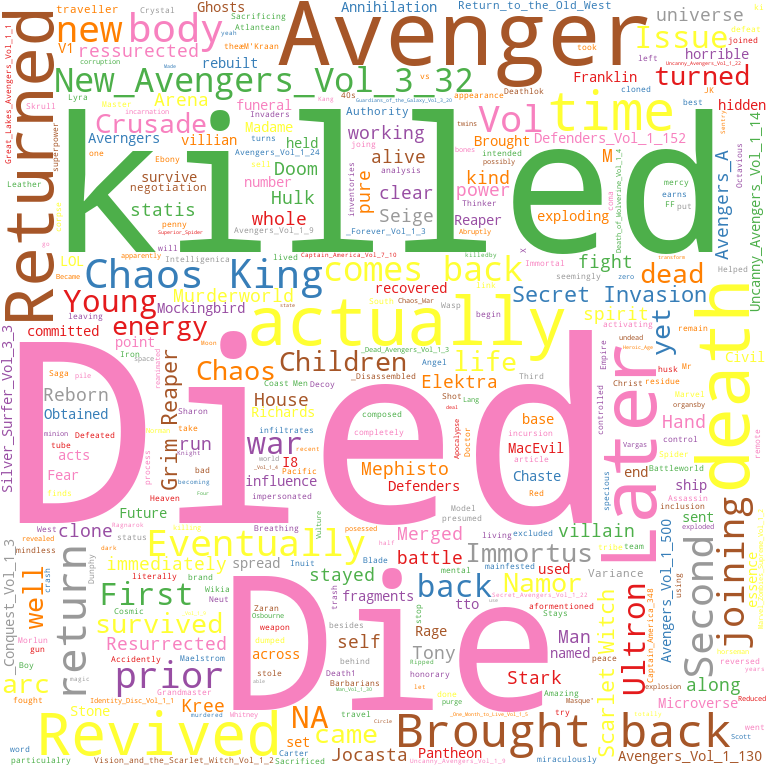

In [117]:
import nltk
from wordcloud import WordCloud
cloud_data = ' '.join([line for line in death.Notes])
stopword = nltk.corpus.stopwords.words('english')

# plot the WordCloud image                       
wc = WordCloud(background_color='white', max_words=2000, mask=transformed,colormap='Set1')
wc.generate(cloud_data)
wc.to_file('word_cloud.png')
wc.to_image()

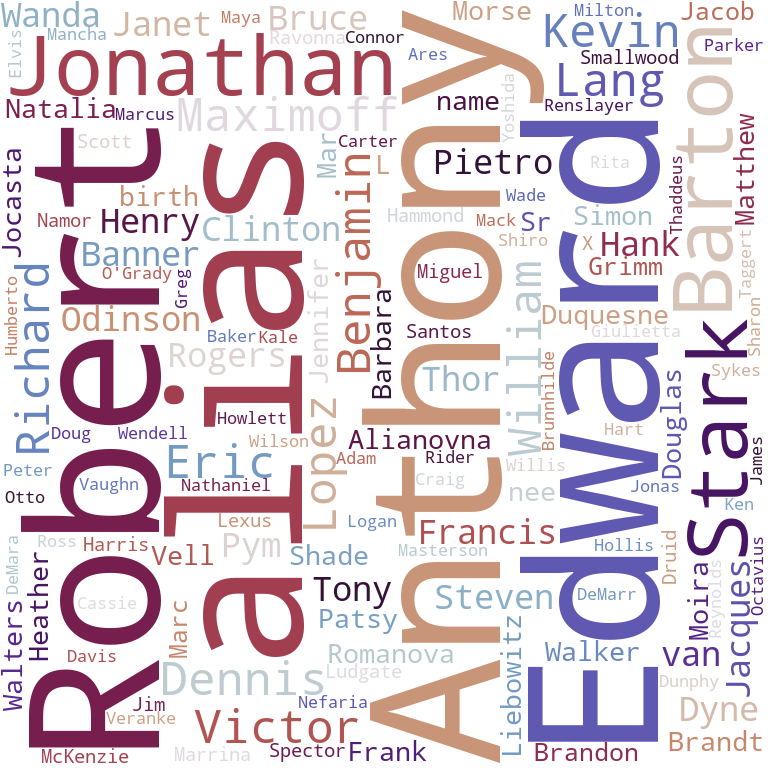

In [119]:
names = data.dropna()
cloud_data = ' '.join([line for line in names['Name/Alias']])
stopword = nltk.corpus.stopwords.words('english')

# plot the WordCloud image                       
wc = WordCloud(background_color='white', max_words=2000, mask=transformed,colormap='twilight_shifted_r')
wc.generate(cloud_data)
wc.to_file('word_cloud2.png')
wc.to_image()